In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import py.parse_runtime as parser


# IMPORT MY LATEX SO I CAN USE \TEXTSC
import matplotlib as mpl
mpl.rc('text', **{'usetex':True})
import re

def parse_runtime( filename ):
    out_dict = {}
    n_regex = re.compile( "N=(\d+)" )
    t_regex = re.compile( "Time CPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_gpu_runtime( filename ):
    out_dict = {}
    n_regex = re.compile( "N=(\d+)" )
    t_regex = re.compile( "Time GPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_core_count( filename ):
    out_dict = {}
    n_regex = re.compile( "C=(\d+)" )
    t_regex = re.compile( "Time CPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_hybrid_runtime( filename ):
    out_dict = {}
    n_regex = re.compile( "N=(\d+)" )
    t_regex = re.compile( "Time CPU and GPU \(total time\): (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_cpu_frac( filename ):
    out_dict = {}
    n_regex = re.compile( "CPUFRAC=(\d+\.\d+)" )
    t_regex = re.compile( "Time CPU and GPU \(total time\): (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = float( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_cpu_gpu_time_frac( filename ):
    out_dict = {}
    n_regex = re.compile( "CPUFRAC=(\d+\.\d+)" )
    c_regex = re.compile( "Time CPU Only: (\d+\.\d+)" )
    g_regex = re.compile( "Time GPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            c_found = c_regex.search( line )
            g_found = g_regex.search( line )
            if n_found:
                n = float( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
                    out_dict[ n ].append( list () )
                    out_dict[ n ].append( list () )
            elif c_found:
                time = float( c_found.group( 1 ) )
                
                if n == 0.0:
                    out_dict[ n ][ 1 ].append( 0.00 )
                else:
                    out_dict[ n ][ 1 ].append( time )
            elif g_found:
                time = float( g_found.group( 1 ) )
                if n == 1.00:
                    out_dict[ n ][ 0 ].append( 0.00 )
                else:
                    out_dict[ n ][ 0 ].append( time )
    out_dict[ 1.0 ][ 0 ] = [ 0 ] * 5
    return out_dict

def parse_cpu_imbalance( filename ):
    out_dict = {}
    n_regex = re.compile( "N=(\d+)" )
    t_regex = re.compile( "Load imbalance: ([+-]?\d+(?:\.\d+)?)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = "Load imbalance:" in line
            if n_found:
                n = int( n_found.group( 1 ) )
                if n not in out_dict:
                    out_dict[ n ] = list()
            elif t_found:
                time = float( line.split( ':' )[ 1 ].strip() )
                out_dict[ n ].append( abs( time ) )
    return out_dict


{'seed': None, 'input_size': None, 'batch_size': None, 'k': None, 'total_size': None, 'num_batches': None, 'num_cpu_batches': None, 'num_gpu_batches': None, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None, 'mu': 0.7}
(0.55, 0.014551599999999998)
(0.5, 0.061575599999999994)
(0.55, 0.0608664)
(0.55, 0.04754280000000001)
(0.5, 0.0674874)
0.5 0.07016433333333333
0.55 0.0694558
0.6 0.09458246666666666
0.65 0.12655593333333334
0.7 0.18336519999999998
0.75 0.22419146666666667


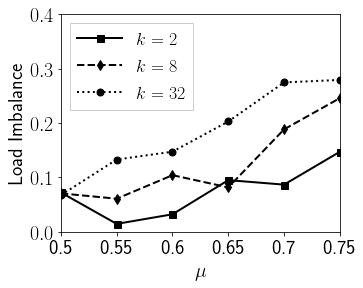

In [9]:
mu_file = '2019-07-02_mu_test.txt'

data = parser.parse( mu_file )
k_dict = data.as_dict( 'k' )
k2_dict = k_dict[ 2 ].as_dict( 'input_size' )[ 1000000000 ].as_dict( 'mu' )
k4_dict = k_dict[ 4 ].as_dict( 'input_size' )[ 1000000000 ].as_dict( 'mu' )
k8_dict = k_dict[ 8 ].as_dict( 'input_size' )[ 1000000000 ].as_dict( 'mu' )
k16_dict = k_dict[ 16 ].as_dict( 'input_size' )[ 1000000000 ].as_dict( 'mu' )
k32_dict = k_dict[ 32 ].as_dict( 'input_size' )[ 1000000000 ].as_dict( 'mu' )

x = sorted( list( k32_dict.keys() ) )



fig = plt.figure( figsize = ( 5, 4 ) )
ax1 = fig.add_subplot( 111 ) 
ax1.tick_params( which = 'major', labelsize = 20 )
ax1.set_ylim( 0, 0.40 )
ax1.set_xticklabels( x )
ax1.set_xticks( x )
ax1.set_xlabel( '$\mu$', fontsize = 20 )
ax1.set_ylabel( 'Load Imbalance', fontsize = 20 )
#ax1.set_title( "$n = 1.0 \\times 10^9$", fontsize = 20 )

print( min( [ ( item, k2_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
print( min( [ ( item, k4_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
print( min( [ ( item, k8_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
print( min( [ ( item, k16_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
print( min( [ ( item, k32_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )    

dicts = [ k2_dict, k8_dict, k32_dict ]
avg_dict = dict()
libs = []
for d in dicts:
    for mu, item in d.items():   
        if mu not in avg_dict:
            avg_dict[ mu ] = list()
        avg_dict[ mu ].append( item.apply( np.mean, 'load_imbalance' ) )
        #print( mu, item.apply( np.mean, 'load_balance' ) )
    #libs += [ d[ item ].apply( np.mean, 'load_imbalance' ) for item, val in d.items() ]
for mu, lib in avg_dict.items():
    print( mu, np.mean( lib ) )
    
lab1 = ax1.plot( x, [ k2_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = '-', c = 'black', 
                marker = 's', markersize = 7, linewidth = 2, label = "$k=2$"
               )
#lab2 = ax1.plot( x, [ k4_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dashed', c = 'black', 
 #               marker = 's', markersize = 7, linewidth = 2, label = "k4"
  #             )
lab3 = ax1.plot( x, [ k8_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dashed', c = 'black', 
                marker = 'd', markersize = 7, linewidth = 2, label = "$k=8$"
               )
#lab4 = ax1.plot( x, [ k16_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dashed', c = 'green', 
 #               marker = 's', markersize = 7, linewidth = 2, label = "k16"
  #             )
lab5 = ax1.plot( x, [ k32_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dotted', c = 'black', 
                marker = 'o', markersize = 7, linewidth = 2, label = "$k = 32$"
               )

lns = lab1 + lab3 + lab5
labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 18, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1
              )
ax1.set_xlim( 0.5, 0.75 )

plt.savefig( 'mu_n_1.pdf', bbox_inches = 'tight' )


{'seed': None, 'input_size': None, 'batch_size': None, 'k': None, 'total_size': None, 'num_batches': None, 'num_cpu_batches': None, 'num_gpu_batches': None, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None, 'mu': 0.7}
(0.75, 0.0541624)
(0.7, 0.034728999999999996)
(0.65, 0.024975599999999997)
(0.6, 0.043620599999999995)
(0.7, 0.048182199999999994)
0.5 0.1687712
0.55 0.1405098
0.6 0.11611139999999999
0.65 0.06138760000000001
0.7 0.06729353333333332
0.75 0.08386213333333332


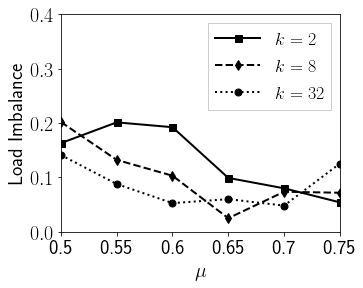

In [8]:
mu_file = '2019-07-02_mu_test.txt'

data = parser.parse( mu_file )
k_dict = data.as_dict( 'k' )
k2_dict = k_dict[ 2 ].as_dict( 'input_size' )[ 4000000000 ].as_dict( 'mu' )
k4_dict = k_dict[ 4 ].as_dict( 'input_size' )[ 4000000000 ].as_dict( 'mu' )
k8_dict = k_dict[ 8 ].as_dict( 'input_size' )[ 4000000000 ].as_dict( 'mu' )
k16_dict = k_dict[ 16 ].as_dict( 'input_size' )[ 4000000000 ].as_dict( 'mu' )
k32_dict = k_dict[ 32 ].as_dict( 'input_size' )[ 4000000000 ].as_dict( 'mu' )

x = sorted( list( k32_dict.keys() ) )


fig = plt.figure( figsize = ( 5, 4 ) )
ax1 = fig.add_subplot( 111 ) 
ax1.tick_params( which = 'major', labelsize = 20 )

ax1.set_ylim( 0, 0.40 )
ax1.set_xticklabels( x )
ax1.set_xticks( x )
ax1.set_xlabel( '$\mu$', fontsize = 20 )
ax1.set_ylabel( 'Load Imbalance', fontsize = 20 )
#ax1.set_title( "$n = 4.0 \\times 10^9$", fontsize = 20 )
print( min( [ ( item, k2_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
print( min( [ ( item, k4_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
print( min( [ ( item, k8_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
print( min( [ ( item, k16_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
print( min( [ ( item, k32_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )    

dicts = [ k2_dict, k8_dict, k32_dict ]
avg_dict = dict()
libs = []
for d in dicts:
    for mu, item in d.items():   
        if mu not in avg_dict:
            avg_dict[ mu ] = list()
        avg_dict[ mu ].append( item.apply( np.mean, 'load_imbalance' ) )
        #print( mu, item.apply( np.mean, 'load_balance' ) )
    #libs += [ d[ item ].apply( np.mean, 'load_imbalance' ) for item, val in d.items() ]
for mu, lib in avg_dict.items():
    print( mu, np.mean( lib ) )
lab1 = ax1.plot( x, [ k2_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = '-', c = 'black', 
                marker = 's', markersize = 7, linewidth = 2, label = "$k=2$"
               )
#lab2 = ax1.plot( x, [ k4_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dashed', c = 'black', 
 #               marker = 's', markersize = 7, linewidth = 2, label = "k4"
  #             )
lab3 = ax1.plot( x, [ k8_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dashed', c = 'black', 
                marker = 'd', markersize = 7, linewidth = 2, label = "$k=8$"
               )
#lab4 = ax1.plot( x, [ k16_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dashed', c = 'green', 
 #               marker = 's', markersize = 7, linewidth = 2, label = "k16"
  #             )
lab5 = ax1.plot( x, [ k32_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dotted', c = 'black', 
                marker = 'o', markersize = 7, linewidth = 2, label = "$k = 32$"
               )

lns = lab1 + lab3 + lab5
labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 18, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1
              )
ax1.set_xlim( 0.5, 0.75 )

plt.savefig( 'mu_n_4.pdf', bbox_inches = 'tight' )

{'seed': None, 'input_size': None, 'batch_size': None, 'k': None, 'total_size': None, 'num_batches': None, 'num_cpu_batches': None, 'num_gpu_batches': None, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None, 'mu': 0.7}
[0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
0.5 0.3134518
0.55 0.22335746666666667
0.6 0.14706733333333333
0.65 0.11080366666666668
0.7 0.10900399999999999
0.75 0.08617226666666666


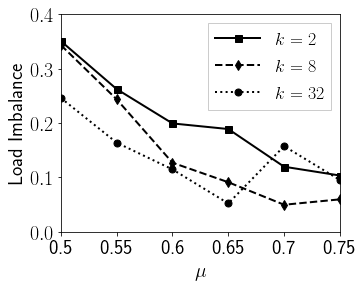

In [7]:
mu_file = '2019-07-02_mu_test.txt'

data = parser.parse( mu_file )
k_dict = data.as_dict( 'k' )
k2_dict = k_dict[ 2 ].as_dict( 'input_size' )[ 8000000000 ].as_dict( 'mu' )
k4_dict = k_dict[ 4 ].as_dict( 'input_size' )[ 8000000000 ].as_dict( 'mu' )
k8_dict = k_dict[ 8 ].as_dict( 'input_size' )[ 8000000000 ].as_dict( 'mu' )
k16_dict = k_dict[ 16 ].as_dict( 'input_size' )[ 8000000000 ].as_dict( 'mu' )
k32_dict = k_dict[ 32 ].as_dict( 'input_size' )[ 8000000000 ].as_dict( 'mu' )

x = sorted( list( k32_dict.keys() ) )
print( x )


fig = plt.figure( figsize = ( 5, 4 ) )
ax1 = fig.add_subplot( 111 ) 
ax1.tick_params( which = 'major', labelsize = 20 )

ax1.set_ylim( 0, 0.40 )
ax1.set_xticks( x )
ax1.set_xticklabels( x )
ax1.set_xlabel( '$\mu$', fontsize = 20 )
ax1.set_ylabel( 'Load Imbalance', fontsize = 20 )
#ax1.set_title( "$n = 8.0 \\times 10^9$", fontsize = 20 )
#print( min( [ ( item, k2_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
#print( min( [ ( item, k4_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
#print( min( [ ( item, k8_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
#print( min( [ ( item, k16_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )
#print( min( [ ( item, k32_dict[ item ].apply( np.mean, 'load_imbalance' ) ) for item in x ], key = lambda t: t[ 1 ] ) )    

dicts = [ k2_dict, k8_dict, k32_dict ]
avg_dict = dict()
libs = []
for d in dicts:
    for mu, item in d.items():   
        if mu not in avg_dict:
            avg_dict[ mu ] = list()
        avg_dict[ mu ].append( item.apply( np.mean, 'load_imbalance' ) )
        #print( mu, item.apply( np.mean, 'load_balance' ) )
    #libs += [ d[ item ].apply( np.mean, 'load_imbalance' ) for item, val in d.items() ]
for mu, lib in avg_dict.items():
    print( mu, np.mean( lib ) )

lab1 = ax1.plot( x, [ k2_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = '-', c = 'black', 
                marker = 's', markersize = 7, linewidth = 2, label = "$k=2$"
               )
#lab2 = ax1.plot( x, [ k4_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dashed', c = 'black', 
 #               marker = 's', markersize = 7, linewidth = 2, label = "k4"
  #             )
lab3 = ax1.plot( x, [ k8_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dashed', c = 'black', 
                marker = 'd', markersize = 7, linewidth = 2, label = "$k=8$"
               )
#lab4 = ax1.plot( x, [ k16_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dashed', c = 'green', 
 #               marker = 's', markersize = 7, linewidth = 2, label = "k16"
  #             )
lab5 = ax1.plot( x, [ k32_dict[ item ].apply( np.mean, 'load_imbalance' ) for item in x ], ls = 'dotted', c = 'black', 
                marker = 'o', markersize = 7, linewidth = 2, label = "$k = 32$"
               )

lns = lab1 + lab3 + lab5

labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 18, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1
              )
ax1.set_xlim( 0.5, 0.75 )
plt.savefig( 'mu_n_8.pdf', bbox_inches = 'tight' )

{'seed': 42, 'input_size': 7000000000, 'batch_size': 2187500, 'k': 32, 'total_size': 53405.761719, 'num_batches': 100, 'num_cpu_batches': 0, 'num_gpu_batches': 100, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
{'seed': 42, 'input_size': 8000000000, 'batch_size': 2500000, 'k': 32, 'total_size': 61035.15625, 'num_batches': 100, 'num_cpu_batches': 0, 'num_gpu_batches': 100, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
{'seed': 42, 'input_size': 7000000000, 'batch_size': 2187500, 'k': 32, 'total_size': 53405.761719, 'num_batches': 100, 'num_cpu_batches': 0, 'num_gpu_batches': 100, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
{'seed': 42, 'input_size': 8000000000, 'batch_size': 2500000, 'k': 32, 'total_size': 61035.15625, 'num_batches': 100, 'num_cpu_batches': 0, 'num_gpu_batches': 100, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_

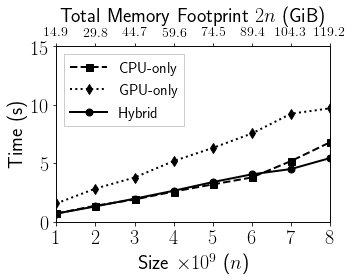

In [7]:
cpu_only_file = 'outfile_cpu_frac_1_combined.txt'
gpu_only_file = 'outfile_cpu_frac_0_combined.txt'
hybrid_file   = '2019-07-10_hybrid_test_output.txt'

cpu_only_data = parser.parse( cpu_only_file )
gpu_only_data = parser.parse( gpu_only_file )
hybrid_data   = parser.parse( hybrid_file )

cpu_lists    = cpu_only_data.as_dict( 'k' )[ 2 ].as_dict( 'input_size' )
gpu_lists    = gpu_only_data.as_dict( 'k' )[ 2 ].as_dict( 'input_size' )
hybrid_lists = hybrid_data.as_dict( 'k' )[ 2 ].as_dict( 'input_size' )

times_cpu    = [ cpu_lists[ item ].apply( np.mean, 'time_cpu_only' ) for item in sorted( cpu_lists.keys() ) ]
times_gpu    = [ gpu_lists[ item ].apply( np.mean, 'time_gpu_only' ) for item in sorted( gpu_lists.keys() ) ]
times_hybrid = [ hybrid_lists[ item ].apply( np.mean, 'total_time' ) for item in sorted( hybrid_lists.keys() ) ]


size_GiB_2n = np.arange( 14.901, 120, 14.9012 )
fig = plt.figure( figsize = ( 5, 4 ) )
ax1 = fig.add_subplot( 111 )
ax2 = ax1.twiny() 

ax1.tick_params( which = 'major', labelsize = 20 )
ax2.tick_params( which = 'major', labelsize = 14 )

x_hybrid = size_GiB_2n
x_single = range( 1, 9 )

lab1 = ax1.plot( x_single, times_cpu, ls = 'dashed', c = 'black', marker = 's', markersize = 7, linewidth = 2, label = "CPU-only")
lab2 = ax1.plot( x_single, times_gpu, ls = 'dotted', c = 'black', marker = 'd', markersize = 7, linewidth = 2, label = "GPU-only")
lab3 = ax2.plot( x_hybrid, times_hybrid, ls = '-', c = 'black', marker = 'o', markersize = 7, linewidth = 2, label = "Hybrid")
ax1.set_xticks( np.arange( 1, 8.01, 1 ) )
ax2.set_xticks( size_GiB_2n )
# set ax2 xticks

speedup = [  cpu / hybrid for cpu, hybrid in zip( times_gpu, times_hybrid ) ]
#print( speedup )
#print( min( speedup ) )
print( np.mean( speedup ) )
#print( max( speedup ) )
#print( np.mean( times_cpu[ 8000000000 ] ) / np.mean( times_hybrid[ 8000000000 ]) )
ax1.set_xlabel( 'Size $\\times10^9$ ($n$)', fontsize = 20)
ax1.set_ylabel( 'Time (s)', fontsize = 20)

ax2.set_xlabel( "Total Memory Footprint $2n$ (GiB)", fontsize = 20 )

# set ax2 xlabel
# add lab3 when available
lns = lab1 + lab2 + lab3

labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1)
ax1.set_ylim( 0, 15 )
ax1.set_xlim( 1, 8 )

#ax2.set_xlim( size_GiB_2n[ 0 ], size_GiB_2n[ -1 ] )
ax2.set_xlim( 14.901, 119.209 )

plt.tight_layout()
fig.savefig( 'size_vs_time_multiway_f2_k2.pdf', bbox_inches = 'tight' )

[0.07301900000000001, 0.027871200000000002, 0.0387818, 0.1042932, 0.0839926, 0.10286819999999999, 0.13353379999999998, 0.2150944]
0.09743177499999998


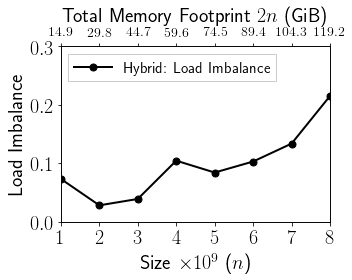

In [3]:
hybrid_file   = '2019-07-10_hybrid_test_output.txt'
hybrid_data   = parser.parse( hybrid_file )

hybrid_lists = hybrid_data.as_dict( 'k' )[ 2 ].as_dict( 'input_size' )

li_hybrid = [ hybrid_lists[ item ].apply( np.mean, 'load_imbalance' ) for item in sorted( hybrid_lists.keys() ) ]

fig = plt.figure( figsize= ( 5, 4 ) ) 

ax1 = fig.add_subplot( 111 )
ax2 = ax1.twiny()

ax1.tick_params( which = 'major', labelsize = 20 )
ax2.tick_params( which = 'major', labelsize = 14 )

x = [ 1, 2, 3, 4, 5, 6, 7, 8 ]
y = li_hybrid
print( y )
print( np.mean( y ) )
size_GiB_2n = np.arange( 14.901, 120, 14.9012 )

lab1 = ax1.plot( x, y, ls = '-', c = 'black', marker = 'o', markersize = 7, linewidth = 2, label = "Hybrid: Load Imbalance")
ax1.set_xticks( np.arange( 1, 8.01, 1 ) )
ax2.set_xticks( size_GiB_2n )
# set ax2 xticks

ax1.set_xlabel( 'Size $\\times10^9$ ($n$)', fontsize = 20)
ax1.set_ylabel( 'Load Imbalance', fontsize = 20)

ax2.set_xlabel( "Total Memory Footprint $2n$ (GiB)", fontsize = 20 )

# set ax2 xlabel
# add lab3 when available
lns = lab1 

labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1)
ax1.set_ylim( 0, 0.3 )
ax1.set_xlim( 1, 8 )
ax1.set_yticks( np.arange( 0, 0.31, 0.10 ))


#ax2.set_xlim( size_GiB_2n[ 0 ], size_GiB_2n[ -1 ] )
ax2.set_xlim( 14.901, 119.209 )

plt.tight_layout()
fig.savefig( 'size_vs_load_imbalance_multiway_f2_k2.pdf', bbox_inches = 'tight' )

{'seed': 42, 'input_size': 7000000000, 'batch_size': 2187500, 'k': 32, 'total_size': 53405.761719, 'num_batches': 100, 'num_cpu_batches': 0, 'num_gpu_batches': 100, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
{'seed': 42, 'input_size': 8000000000, 'batch_size': 2500000, 'k': 32, 'total_size': 61035.15625, 'num_batches': 100, 'num_cpu_batches': 0, 'num_gpu_batches': 100, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
{'seed': 42, 'input_size': 7000000000, 'batch_size': 2187500, 'k': 32, 'total_size': 53405.761719, 'num_batches': 100, 'num_cpu_batches': 0, 'num_gpu_batches': 100, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
{'seed': 42, 'input_size': 8000000000, 'batch_size': 2500000, 'k': 32, 'total_size': 61035.15625, 'num_batches': 100, 'num_cpu_batches': 0, 'num_gpu_batches': 100, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_

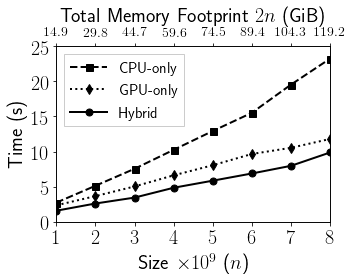

In [2]:
cpu_only_file = 'outfile_cpu_frac_1_combined.txt'
gpu_only_file = 'outfile_cpu_frac_0_combined.txt'
hybrid_file   = '2019-07-10_hybrid_test_output.txt'

cpu_only_data = parser.parse( cpu_only_file )
gpu_only_data = parser.parse( gpu_only_file )
hybrid_data   = parser.parse( hybrid_file )

cpu_lists    = cpu_only_data.as_dict( 'k' )[ 32 ].as_dict( 'input_size' )
gpu_lists    = gpu_only_data.as_dict( 'k' )[ 32 ].as_dict( 'input_size' )
hybrid_lists = hybrid_data.as_dict( 'k' )[ 32 ].as_dict( 'input_size' )

times_cpu    = [ cpu_lists[ item ].apply( np.mean, 'time_cpu_only' ) for item in sorted( cpu_lists.keys() ) ]
times_gpu    = [ gpu_lists[ item ].apply( np.mean, 'time_gpu_only' ) for item in sorted( gpu_lists.keys() ) ]
times_hybrid = [ hybrid_lists[ item ].apply( np.mean, 'total_time' ) for item in sorted( hybrid_lists.keys() ) ]

speedup = [  gpu / hybrid for gpu, hybrid in zip( times_cpu, times_hybrid ) ]
#print( speedup )
#print( min( speedup ) )
print( np.mean( speedup ) )
#print( max( speedup ) )
size_GiB_2n = np.arange( 14.901, 120, 14.9012 )
fig = plt.figure( figsize = ( 5, 4 ) )
ax1 = fig.add_subplot( 111 )
ax2 = ax1.twiny() 

ax1.tick_params( which = 'major', labelsize = 20 )
ax2.tick_params( which = 'major', labelsize = 14 )

x_hybrid = size_GiB_2n
x_single = range( 1, 9 )

lab1 = ax1.plot( x_single, times_cpu, ls = 'dashed', c = 'black', marker = 's', markersize = 7, linewidth = 2, label = "CPU-only")
lab2 = ax1.plot( x_single, times_gpu, ls = 'dotted', c = 'black', marker = 'd', markersize = 7, linewidth = 2, label = "GPU-only")
lab3 = ax2.plot( x_hybrid, times_hybrid, ls = '-', c = 'black', marker = 'o', markersize = 7, linewidth = 2, label = "Hybrid")
ax1.set_xticks( np.arange( 1, 8.01, 1 ) )
ax2.set_xticks( size_GiB_2n )
# set ax2 xticks

#print( np.mean( times_cpu[ 8000000000 ] ) / np.mean( times_hybrid[ 8000000000 ]) )
ax1.set_xlabel( 'Size $\\times10^9$ ($n$)', fontsize = 20)
ax1.set_ylabel( 'Time (s)', fontsize = 20)

ax2.set_xlabel( "Total Memory Footprint $2n$ (GiB)", fontsize = 20 )

# set ax2 xlabel
# add lab3 when available
lns = lab1 + lab2 + lab3

labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1)
ax1.set_ylim( 0, 25 )
ax1.set_yticks( range( 0, 26, 5 ) )
ax1.set_xlim( 1, 8 )

#ax2.set_xlim( size_GiB_2n[ 0 ], size_GiB_2n[ -1 ] )
ax2.set_xlim( 14.901, 119.209 )

plt.tight_layout()
fig.savefig( 'size_vs_time_multiway_f2_k32.pdf', bbox_inches = 'tight' )

[0.1619526, 0.05639879999999999, 0.0180648, 0.06230100000000001, 0.0397234, 0.0346976, 0.042244800000000006, 0.0811036]
Load imbalance 0.062060825


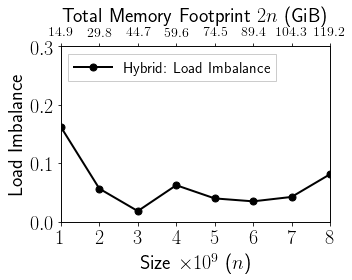

In [14]:
hybrid_file   = '2019-07-10_hybrid_test_output.txt'
hybrid_data   = parser.parse( hybrid_file )

hybrid_lists = hybrid_data.as_dict( 'k' )[ 32 ].as_dict( 'input_size' )

li_hybrid = [ hybrid_lists[ item ].apply( np.mean, 'load_imbalance' ) for item in sorted( hybrid_lists.keys() ) ]

fig = plt.figure( figsize= ( 5, 4 ) ) 

ax1 = fig.add_subplot( 111 )
ax2 = ax1.twiny()

ax1.tick_params( which = 'major', labelsize = 20 )
ax2.tick_params( which = 'major', labelsize = 14 )

x = [ 1, 2, 3, 4, 5, 6, 7, 8 ]
y = li_hybrid
print( y )
print( "Load imbalance", np.mean( y ))
size_GiB_2n = np.arange( 14.901, 120, 14.9012 )

lab1 = ax1.plot( x, y, ls = '-', c = 'black', marker = 'o', markersize = 7, linewidth = 2, label = "Hybrid: Load Imbalance")
ax1.set_xticks( np.arange( 1, 8.01, 1 ) )
ax2.set_xticks( size_GiB_2n )
# set ax2 xticks

ax1.set_xlabel( 'Size $\\times10^9$ ($n$)', fontsize = 20)
ax1.set_ylabel( 'Load Imbalance', fontsize = 20)

ax2.set_xlabel( "Total Memory Footprint $2n$ (GiB)", fontsize = 20 )

# set ax2 xlabel
# add lab3 when available
lns = lab1 

labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1)
ax1.set_ylim( 0, 0.3 )
ax1.set_xlim( 1, 8 )
ax1.set_yticks( np.arange( 0, 0.31, 0.1 ) )


#ax2.set_xlim( size_GiB_2n[ 0 ], size_GiB_2n[ -1 ] )
ax2.set_xlim( 14.901, 119.209 )

plt.tight_layout()
fig.savefig( 'size_vs_load_imbalance_multiway_f2_k32.pdf', bbox_inches = 'tight' )

N:  1000000000
N:  2000000000
N:  3000000000
N:  4000000000
N:  5000000000
{1000000000: [1.648479, 1.67644, 1.648134, 1.858499, 1.614204, 1.675532], 2000000000: [3.302317, 3.186133, 3.247264, 3.125404, 3.32394, 3.244102], 3000000000: [4.917774, 4.664787, 4.840819, 4.867389, 4.813148, 4.761134], 4000000000: [6.339725, 6.548195, 6.544226, 6.166334, 7.006205, 6.774142], 5000000000: [8.416452, 8.307911, 9.434832, 8.318536, 8.7026, 8.416097]}


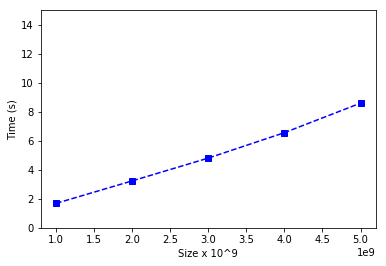

In [25]:
times = parse_runtime( 'outfile_2.tsv' )
ax = plt.subplot()

x = list( times.keys() )
y = [ np.mean( times[ value ] ) for value in x ]
ax.set_ylim( 0, 15 )
plt.suptitle( "")
plt.xlabel( "Size x 10^9")
plt.ylabel( "Time (s)")
ax.plot( x, y, "bs--" )
print( times) 

N:  1
N:  2
N:  4
N:  8
N:  16
{1: [18.303793, 18.331407, 18.331028, 18.298071, 18.29694, 18.310826], 2: [9.50209, 9.423733, 9.466938, 9.356036, 9.393869, 9.318862], 4: [5.036041, 5.444924, 5.150116, 5.784407, 5.395327, 5.565976], 8: [2.838335, 2.823942, 2.72738, 2.813958, 2.941283, 2.775347], 16: [1.81365, 1.729895, 1.928719, 1.588934, 1.702559, 1.923143]}


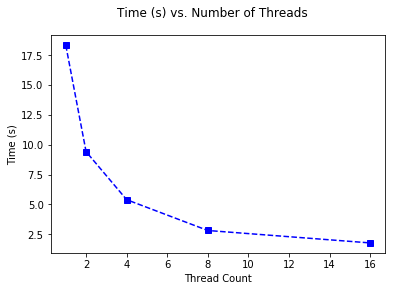

In [9]:
times = parse_core_count( 'outfile_scale.txt' )
ax = plt.subplot()

x = list( times.keys() )
y = [ np.mean( times[ value ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Time (s) vs. Number of Threads")
plt.xlabel( "Thread Count")
plt.ylabel( "Time (s)")
ax.plot( x, y, "bs--" )
print( times) 


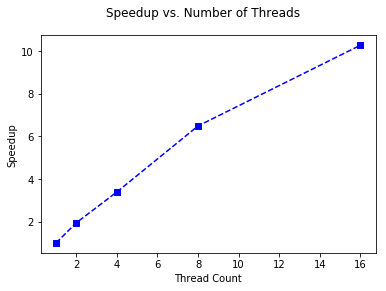

In [10]:
ax = plt.subplot()
t_0 = np.mean( times[ 1 ] )
x = list( times.keys() )
y = [ t_0 / np.mean( times[ value ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Speedup vs. Number of Threads")
plt.xlabel( "Thread Count")
plt.ylabel( "Speedup")
ax.plot( x, y, "bs--" )

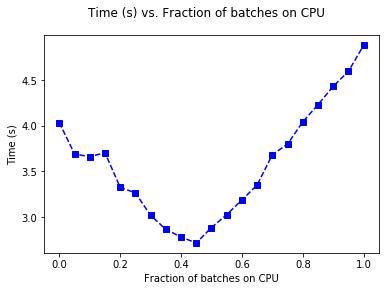

{0.0: [4.255237, 3.998292, 3.831167, 4.049007], 0.05: [3.414951, 3.971703, 3.685293], 0.1: [3.449885, 3.62951, 3.826969, 3.729008], 0.15: [3.74911, 3.830512, 3.730504, 3.505326], 0.2: [3.263455, 3.485457, 3.407743, 3.14011], 0.25: [3.178281, 3.531741, 3.389092, 2.954296], 0.3: [2.860827, 2.830336, 3.08298, 3.29434], 0.35: [2.665436, 2.782111, 3.010119, 2.997645], 0.4: [2.744983, 2.835474, 2.736945, 2.799252], 0.45: [2.590384, 2.820261, 2.604845, 2.843738], 0.5: [2.928316, 2.87164, 2.854, 2.878352], 0.55: [3.08784, 3.020556, 2.995549, 2.996593], 0.6: [3.245355, 3.066576, 3.246079, 3.18221], 0.65: [3.420428, 3.249259, 3.353585, 3.376441], 0.7: [3.726143, 3.586505, 3.900045, 3.515594], 0.75: [3.783229, 3.718542, 3.851761, 3.838796], 0.8: [4.052272, 4.028176, 4.172019, 3.915152], 0.85: [4.157992, 4.18159, 4.26433, 4.31692], 0.9: [4.464705, 4.592281, 4.363524, 4.305398], 0.95: [4.510847, 4.671768, 4.665907, 4.53312], 1.0: [4.76565, 4.801104, 4.983595, 4.974867]}


In [2]:
times = parse_cpu_frac( 'cpu_out.txt' )
ax = plt.subplot()

x = list( times.keys() )
y = [ np.mean( times[ value ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Time (s) vs. Fraction of batches on CPU")
plt.xlabel( "Fraction of batches on CPU")
plt.ylabel( "Time (s)")
ax.plot( x, y, "bs--" )
plt.show()
print( times) 

{0.0: [0.987108, 0.99799, 0.987207, 0.997871], 0.05: [0.888077, 0.890573, 0.877576], 0.1: [0.788433, 0.80435, 0.819594, 0.817241], 0.15: [0.739738, 0.742556, 0.739931, 0.724066], 0.2: [0.607453, 0.642687, 0.645849, 0.617806], 0.25: [0.50589, 0.570424, 0.516552, 0.483973], 0.3: [0.407967, 0.336949, 0.409371, 0.422139], 0.35: [0.233294, 0.266182, 0.310018, 0.294215], 0.4: [0.089756, 0.122621, 0.096917, 0.160373], 0.45: [0.132699, 0.052577, 0.027209, 0.038115], 0.5: [0.121871, 0.064184, 0.16042, 0.207446], 0.55: [0.36181, 0.326982, 0.244721, 0.286568], 0.6: [0.351856, 0.40144, 0.380884, 0.361644], 0.65: [0.46233, 0.472807, 0.503035, 0.537676], 0.7: [0.65189, 0.607148, 0.670603, 0.604212], 0.75: [0.661194, 0.639425, 0.686301, 0.699308], 0.8: [0.759271, 0.721258, 0.765846, 0.717967], 0.85: [0.809034, 0.828669, 0.806754, 0.81963], 0.9: [0.884674, 0.863352, 0.866085, 0.856366], 0.95: [0.922934, 0.924652, 0.937679, 0.928263], 1.0: [4008615.375282, 3979039.758799, 3833359.518202, 3840110.409858

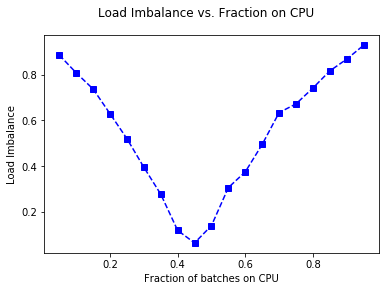

In [7]:
times = parse_cpu_imbalance( 'cpu_out.txt' )
ax = plt.subplot()

x = list( times.keys() )[ 1:-1 ]
y = [ np.mean( [ abs( item ) for item in times[ value ] ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Load Imbalance vs. Fraction on CPU")
plt.xlabel( "Fraction of batches on CPU")
plt.ylabel( "Load Imbalance")
ax.plot( x, y, "bs--" )
print( times) 

[1.1484822, 1.9524312000000001, 2.7044494, 3.6276678, 4.7736350000000005, 5.488026199999999, 6.382032199999999, 7.2446894]
[1.5407166084071655, 1.6757725445075862, 1.7732308099386143, 1.772997075421294, 1.7789524754196746, 1.7278577496587026, 1.9783253052217447, 1.9498234389454987]
Speedup 1.774709500940035


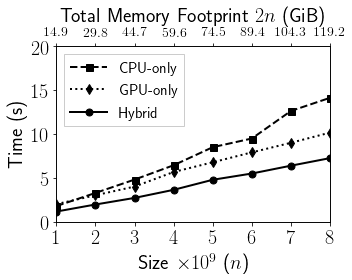

In [17]:
times_cpu = parse_runtime( 'cpu_only_out.txt' )
times_gpu = parse_gpu_runtime( 'gpu_only_out.txt' )
times_hybrid = parse_hybrid_runtime( 'hybrid_out.txt' )

cpu_only_file = 'cpu_only_out.txt'
gpu_only_file = 'gpu_only_out.txt'
hybrid_file   = '2019-07-10_hybrid_test_output.txt'

#cpu_only_data = parser.parse( cpu_only_file )
#gpu_only_data = parser.parse( gpu_only_file )
#hybrid_data   = parser.parse( hybrid_file )

#cpu_lists    = cpu_only_data.as_dict( 'k' )[ 8 ].as_dict( 'input_size' )
#gpu_lists    = gpu_only_data.as_dict( 'k' )[ 8 ].as_dict( 'input_size' )
#hybrid_lists = hybrid_data.as_dict( 'k' )[ 8 ].as_dict( 'input_size' )

#times_cpu    = [ cpu_lists[ item ].apply( np.mean, 'time_cpu_only' ) for item in sorted( cpu_lists.keys() ) ]
#times_gpu    = [ gpu_lists[ item ].apply( np.mean, 'time_gpu_only' ) for item in sorted( gpu_lists.keys() ) ]
times_cpu = [ np.mean( times_cpu[ item ] ) for item in sorted( times_cpu.keys() )] 
times_gpu = [ np.mean( times_gpu[ item ] ) for item in sorted( times_gpu.keys() )]
del times_hybrid[ 9000000000 ]
times_hybrid = [ np.mean( times_hybrid[ item ] ) for item in sorted( times_hybrid.keys() )]
print( times_hybrid )
#times_hybrid = [ hybrid_lists[ item ].apply( np.mean, 'total_time' ) for item in sorted( hybrid_lists.keys() ) ]


size_GiB_2n = np.arange( 14.901, 120, 14.9012 )
fig = plt.figure( figsize = ( 5, 4 ) )
ax1 = fig.add_subplot( 111 )
ax2 = ax1.twiny() 

ax1.tick_params( which = 'major', labelsize = 20 )
ax2.tick_params( which = 'major', labelsize = 14 )

x_hybrid = size_GiB_2n
x_single = range( 1, 9 )

lab1 = ax1.plot( x_single, times_cpu, ls = 'dashed', c = 'black', marker = 's', markersize = 7, linewidth = 2, label = "CPU-only")
lab2 = ax1.plot( x_single, times_gpu, ls = 'dotted', c = 'black', marker = 'd', markersize = 7, linewidth = 2, label = "GPU-only")
lab3 = ax2.plot( x_hybrid, times_hybrid, ls = '-', c = 'black', marker = 'o', markersize = 7, linewidth = 2, label = "Hybrid")
ax1.set_xticks( np.arange( 1, 8.01, 1 ) )
ax2.set_xticks( size_GiB_2n )
# set ax2 xticks

speedup = [  cpu / gpu for cpu, gpu in zip( times_cpu, times_hybrid ) ]
print( speedup )
#print( min( speedup ) )
print( "Speedup", np.mean( speedup ) )
#print( max( speedup ) )
#print( np.mean( times_cpu[ 8000000000 ] ) / np.mean( times_hybrid[ 8000000000 ]) )
ax1.set_xlabel( 'Size $\\times10^9$ ($n$)', fontsize = 20)
ax1.set_ylabel( 'Time (s)', fontsize = 20)

ax2.set_xlabel( "Total Memory Footprint $2n$ (GiB)", fontsize = 20 )

# set ax2 xlabel
# add lab3 when available
lns = lab1 + lab2 + lab3

labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1)
ax1.set_ylim( 0, 20 )
ax1.set_xlim( 1, 8 )

#ax2.set_xlim( size_GiB_2n[ 0 ], size_GiB_2n[ -1 ] )
ax2.set_xlim( 14.901, 119.209 )

plt.tight_layout()
fig.savefig( 'size_vs_time_multiway_f2_k8.pdf', bbox_inches = 'tight' )

[0.1522534, 0.0321986, 0.0771888, 0.0871912, 0.1126846, 0.0788556, 0.0766604, 0.1397488]
0.094597675


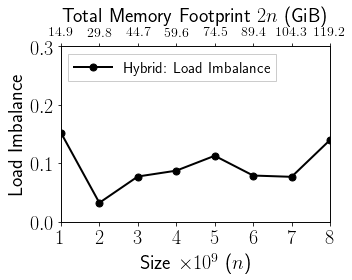

In [8]:
hybrid_file   = '2019-07-10_hybrid_test_output.txt'
hybrid_data   = parser.parse( hybrid_file )

hybrid_lists = hybrid_data.as_dict( 'k' )[ 8 ].as_dict( 'input_size' )

li_hybrid = [ hybrid_lists[ item ].apply( np.mean, 'load_imbalance' ) for item in sorted( hybrid_lists.keys() ) ]

fig = plt.figure( figsize= ( 5, 4 ) ) 

ax1 = fig.add_subplot( 111 )
ax2 = ax1.twiny()

ax1.tick_params( which = 'major', labelsize = 20 )
ax2.tick_params( which = 'major', labelsize = 14 )

x = [ 1, 2, 3, 4, 5, 6, 7, 8 ]
y = li_hybrid
print( y )
print( np.mean( y ))
size_GiB_2n = np.arange( 14.901, 120, 14.9012 )

lab1 = ax1.plot( x, y, ls = '-', c = 'black', marker = 'o', markersize = 7, linewidth = 2, label = "Hybrid: Load Imbalance")
ax1.set_xticks( np.arange( 1, 8.01, 1 ) )
ax2.set_xticks( size_GiB_2n )
# set ax2 xticks

ax1.set_xlabel( 'Size $\\times10^9$ ($n$)', fontsize = 20)
ax1.set_ylabel( 'Load Imbalance', fontsize = 20)

ax2.set_xlabel( "Total Memory Footprint $2n$ (GiB)", fontsize = 20 )

# set ax2 xlabel
# add lab3 when available
lns = lab1 

labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1)
ax1.set_ylim( 0, 0.3 )
ax1.set_xlim( 1, 8 )
ax1.set_yticks( np.arange( 0, 0.4, 0.1 ) )


#ax2.set_xlim( size_GiB_2n[ 0 ], size_GiB_2n[ -1 ] )
ax2.set_xlim( 14.901, 119.209 )

plt.tight_layout()
fig.savefig( 'size_vs_load_imbalance_multiway_f2_k8.pdf', bbox_inches = 'tight' )

[0, 0.0959228, 0.165047, 0.2664516, 0.32966860000000003, 0.3746862, 0.5143956000000001, 0.5317342, 0.5652014, 0.7175722, 0.7163608, 0.7568246000000001, 0.9936952, 1.0052712, 0.8939311999999999, 1.0725099999999999, 1.1186926, 1.0576910000000002, 0.938731, 0.9305045999999999, 1.0690998]
Saving figure: time_vs_cpu_frac_predecessor.pdf


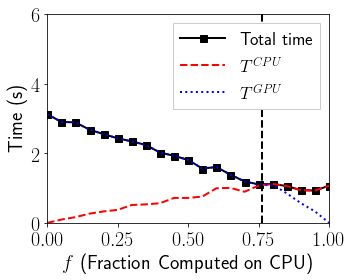

In [22]:
times = parse_cpu_gpu_time_frac( 'cpu_frac_out.txt_2' )
hybrid_times = parse_cpu_frac( 'cpu_frac_out.txt_2' )

fracs = sorted( list( times.keys() ) )
frac_cpu = fracs
time_hybrid = [ np.mean( hybrid_times[ item ] ) for item in hybrid_times ]
time_gpu_end = list()
for item in fracs:
    time_gpu_end.append( np.mean( times[ item ][ 0 ] ) )
time_cpu_end = list()
for item in fracs:
    if times[ item ][ 1 ] == []:
        times[ item ][ 1 ] = [ 0 ] 
    time_cpu_end.append( np.mean( times[ item ][ 1 ] ) )

fig = plt.figure( figsize = ( 5, 4) )
ax1 = fig.add_subplot( 111 )

ax1.tick_params( which = 'major', labelsize = 20 )

#print( time_hybrid )\
time_cpu_end[ 0 ] = 0
print( time_cpu_end )
#print( time_gpu_end )

lab1=ax1.plot(frac_cpu, np.asfarray( time_hybrid ), ls='solid',   c='black', marker='s', markersize=7, linewidth=2, label="Total time")
lab1=ax1.plot(frac_cpu, np.asfarray( time_cpu_end ), ls='dashed',   c='red', marker='None', markersize=7, linewidth=2, label="$T^{CPU}$")
lab1=ax1.plot(frac_cpu, np.asfarray( time_gpu_end ), ls='dotted',   c='blue', marker='None', markersize=7, linewidth=2, label="$T^{GPU}$")

model_f = 0.76
plt.axvline( x = model_f, linewidth = 2, color = 'black', linestyle = 'dashed')

ax1.set_xlabel( '$f$ (Fraction Computed on CPU)', fontsize = 20 )
ax1.set_ylabel( 'Time (s)', fontsize = 20 )

l=ax1.legend(fontsize=18, loc='upper right', fancybox=False, framealpha=1, handlelength=2.5, ncol=1)


ax1.set_ylim(0,6)
ax1.set_xlim(0,1)

# ax2.set_xlim(22.351,111.76)


plt.tight_layout()
print( "Saving figure: time_vs_cpu_frac_predecessor.pdf" )
fig.savefig("time_vs_cpu_frac_scan.pdf", bbox_inches='tight')



{0.0: [5.802161, 5.933115, 5.866218, 5.506624, 5.819818], 0.05: [5.149437, 5.247888, 5.134244, 4.984435, 5.186209], 0.1: [5.251894, 5.108616, 5.191397, 4.962547, 5.22614], 0.15: [4.742083, 4.663291, 5.004973, 4.308763, 4.915773], 0.2: [4.684535, 4.777667, 4.680846, 4.442051, 4.930452], 0.25: [4.680843, 4.37576, 4.627803, 4.527916, 4.187773], 0.3: [4.299447, 4.319019, 4.414791, 4.085124, 4.357017], 0.35: [3.58659, 4.05549, 3.926736, 4.121996, 4.132802], 0.4: [3.698501, 3.85843, 4.005521, 3.88106, 3.948032], 0.45: [3.464309, 3.907431, 3.790306, 3.560869, 3.728751], 0.5: [3.713845, 3.902438, 3.896676, 3.717519, 3.768806], 0.55: [3.835898, 4.017181, 3.932105, 3.945861, 4.152794], 0.6: [4.209488, 4.30974, 4.352846, 4.151123, 4.174334], 0.65: [4.337516, 4.556027, 4.487784, 4.485467, 4.815637], 0.7: [4.597903, 4.624622, 4.838806, 4.808722, 4.592812], 0.75: [4.918591, 5.0242, 4.860737, 4.989653, 5.077338], 0.8: [5.275039, 5.249641, 5.429071, 5.314876, 5.242669], 0.85: [5.629897, 5.507561, 5.40

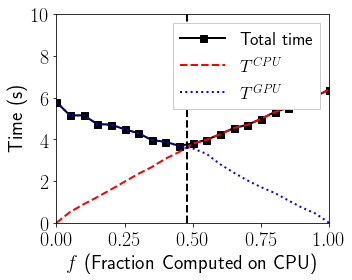

In [17]:
fname = '2019-07-28_cpu_out.txt'
times = parse_cpu_gpu_time_frac( fname  )
hybrid_times = parse_cpu_frac( fname )
print( hybrid_times )
fracs = sorted( list( times.keys() ) )
frac_cpu = fracs
time_hybrid = [ np.mean( hybrid_times[ item ] ) for item in hybrid_times ]
time_gpu_end = list()
for item in fracs:
    time_gpu_end.append( np.mean( times[ item ][ 0 ] ) )
time_cpu_end = list()
for item in fracs:
    if times[ item ][ 1 ] == []:
        times[ item ][ 1 ] = [ 0 ] 
    time_cpu_end.append( np.mean( times[ item ][ 1 ] ) )

fig = plt.figure( figsize = ( 5, 4) )
ax1 = fig.add_subplot( 111 )

ax1.tick_params( which = 'major', labelsize = 20 )

#print( time_hybrid )\
time_cpu_end[ 0 ] = 0
print( time_cpu_end )
#print( time_gpu_end )

lab1=ax1.plot(frac_cpu, np.asfarray( time_hybrid ), ls='solid',   c='black', marker='s', markersize=7, linewidth=2, label="Total time")
lab1=ax1.plot(frac_cpu, np.asfarray( time_cpu_end ), ls='dashed',   c='red', marker='None', markersize=7, linewidth=2, label="$T^{CPU}$")
lab1=ax1.plot(frac_cpu, np.asfarray( time_gpu_end ), ls='dotted',   c='blue', marker='None', markersize=7, linewidth=2, label="$T^{GPU}$")

model_f = 0.48
plt.axvline( x = model_f, linewidth = 2, color = 'black', linestyle = 'dashed')

ax1.set_xlabel( '$f$ (Fraction Computed on CPU)', fontsize = 20 )
ax1.set_ylabel( 'Time (s)', fontsize = 20 )

l=ax1.legend(fontsize=18, loc='upper right', fancybox=False, framealpha=1, handlelength=2.5, ncol=1)


ax1.set_ylim(0,10)
ax1.set_xlim(0,1)

# ax2.set_xlim(22.351,111.76)


plt.tight_layout()
print( "Saving figure: time_vs_cpu_frac_predecessor.pdf" )
fig.savefig("time_vs_cpu_frac_mm_f2.pdf", bbox_inches='tight')



{0.0: [6.460041, 6.647567, 6.541612, 6.268521, 6.423235], 0.05: [6.222679, 6.135776, 6.13658, 6.001935, 5.947428], 0.1: [5.695669, 5.753928, 5.888279, 5.939586, 5.704504], 0.15: [5.970357, 5.513364, 5.619554, 5.504044, 5.862213], 0.2: [5.24904, 5.62059, 5.22978, 5.212794, 5.565742], 0.25: [5.273824, 5.398796, 5.34635, 5.465559, 5.291745], 0.3: [4.801796, 5.052181, 4.84738, 4.832696, 4.873534], 0.35: [5.031758, 4.75901, 4.823962, 4.966328], 0.4: [5.151388, 5.957029, 5.596005, 5.680202, 5.837679], 0.45: [5.694137, 5.971876, 6.106992, 5.772191, 5.699789], 0.5: [6.30528, 6.638162, 6.246324, 6.23734, 5.789905], 0.55: [6.583289, 6.493382, 6.117326, 6.873373, 6.166226], 0.6: [6.714097, 6.935339, 7.060133, 6.45096], 0.65: [6.985534, 7.419986, 7.477936, 7.21302], 0.7: [7.547301, 7.508168, 7.789956, 7.926805, 7.518285], 0.75: [7.991293, 7.96326, 8.057571, 7.989069, 8.170266], 0.8: [8.595448, 8.437814, 8.316473], 0.85: [8.738213, 9.071175, 8.798953, 8.922908, 8.817653], 0.9: [9.09448, 9.298844, 9

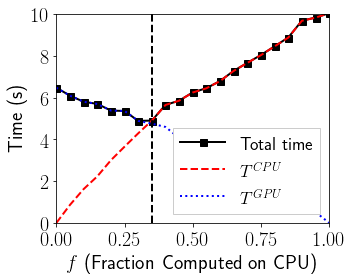

In [9]:
fname = '2019-08-04_cpu_out_k32.txt'
times = parse_cpu_gpu_time_frac( fname  )
hybrid_times = parse_cpu_frac( fname )
print( hybrid_times )
fracs = sorted( list( times.keys() ) )
frac_cpu = fracs
time_hybrid = [ np.mean( hybrid_times[ item ] ) for item in hybrid_times ]
time_gpu_end = list()
for item in fracs:
    time_gpu_end.append( np.mean( times[ item ][ 0 ] ) )
time_cpu_end = list()
for item in fracs:
    if times[ item ][ 1 ] == []:
        times[ item ][ 1 ] = [ 0 ] 
    time_cpu_end.append( np.mean( times[ item ][ 1 ] ) )

fig = plt.figure( figsize = ( 5, 4) )
ax1 = fig.add_subplot( 111 )

ax1.tick_params( which = 'major', labelsize = 20 )

#print( time_hybrid )\
time_cpu_end[ 0 ] = 0
print( time_cpu_end )
#print( time_gpu_end )

lab1=ax1.plot(frac_cpu, np.asfarray( time_hybrid ), ls='solid',   c='black', marker='s', markersize=7, linewidth=2, label="Total time")
lab1=ax1.plot(frac_cpu, np.asfarray( time_cpu_end ), ls='dashed',   c='red', marker='None', markersize=7, linewidth=2, label="$T^{CPU}$")
lab1=ax1.plot(frac_cpu, np.asfarray( time_gpu_end ), ls='dotted',   c='blue', marker='None', markersize=7, linewidth=2, label="$T^{GPU}$")

model_f = 0.35
plt.axvline( x = model_f, linewidth = 2, color = 'black', linestyle = 'dashed')

ax1.set_xlabel( '$f$ (Fraction Computed on CPU)', fontsize = 20 )
ax1.set_ylabel( 'Time (s)', fontsize = 20 )

l=ax1.legend(fontsize=18, loc='lower right', fancybox=False, framealpha=1, handlelength=2.5, ncol=1)


ax1.set_ylim(0,10)
ax1.set_xlim(0,1)

# ax2.set_xlim(22.351,111.76)


plt.tight_layout()
print( "Saving figure: time_vs_cpu_frac_predecessor.pdf" )
fig.savefig("time_vs_cpu_frac_mm_f2_k32.pdf", bbox_inches='tight')
